In [138]:
import torch
from torch import nn
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [139]:
x = np.arange(- math.pi/2 , math.pi/2 ,1/32)

In [140]:
target = [ math.sin(v) for v in x] 

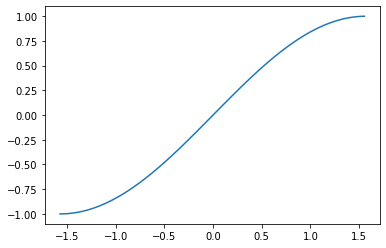

In [141]:
x_data = torch.tensor(x)
y_data = torch.tensor(target)
len(x_data)
plt.plot(x_data, y_data)

In [142]:
'''
def data(df):
    def __init__(self, path):
        self.x = df.x
        self.y = df.y
        
    def length(self):
        return len(self.x)
    
    def getitem(i):
        return self.x[i], self.y[i]
'''

'\ndef data(df):\n    def __init__(self, path):\n        self.x = df.x\n        self.y = df.y\n        \n    def length(self):\n        return len(self.x)\n    \n    def getitem(i):\n        return self.x[i], self.y[i]\n'

In [143]:
class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self,inputs):
        #x = self.flatten(inputs)
        return self.linear_relu(inputs)
model = DeepModel()

In [144]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_data, y_data)
train_ds[0:3]

(tensor([-1.5708, -1.5395, -1.5083], dtype=torch.float64),
 tensor([-1.0000, -0.9995, -0.9980]))

In [145]:
print(model.parameters())

<generator object Module.parameters at 0x7fb4289e3970>


In [146]:
import torch.nn.functional as F

loss_fn = F.mse_loss
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [153]:
preds = []

for t in range(1000): 
    preds= []
    for x,y in train_ds:
        pred = model(x.reshape(-1).float())
        loss = loss_fn(pred, y.reshape(-1).float())
        loss.backward()
        opt.step()
        opt.zero_grad()
        preds.append(pred.item())

In [154]:
y_pred = preds

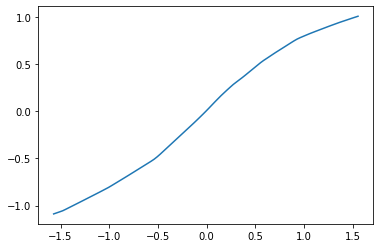

In [155]:
plt.plot(x_data,y_pred)